In [25]:
#coding:utf-8
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/Users/szkfzx/datasets/ScikitLearn"]).decode("utf8"))#执行一条sh命令

# Any results you write to the current directory are saved as output.

test.csv
train.csv
trainLabels.csv
working



In [2]:
# read csv (comma separated value) into data
train = pd.read_csv('/Users/szkfzx/datasets/ScikitLearn/train.csv', header=None)
trainLabel = pd.read_csv('/Users/szkfzx/datasets/ScikitLearn/trainLabels.csv', header=None)
test = pd.read_csv('/Users/szkfzx/datasets/ScikitLearn/test.csv', header=None)
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [3]:
print('train shape:', train.shape)
print('test shape:', test.shape)
print('trainLabel shape:', trainLabel.shape)
train.head()

train shape: (1000, 40)
test shape: (9000, 40)
trainLabel shape: (1000, 1)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

In [5]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [26]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 40 columns):
0     9000 non-null float64
1     9000 non-null float64
2     9000 non-null float64
3     9000 non-null float64
4     9000 non-null float64
5     9000 non-null float64
6     9000 non-null float64
7     9000 non-null float64
8     9000 non-null float64
9     9000 non-null float64
10    9000 non-null float64
11    9000 non-null float64
12    9000 non-null float64
13    9000 non-null float64
14    9000 non-null float64
15    9000 non-null float64
16    9000 non-null float64
17    9000 non-null float64
18    9000 non-null float64
19    9000 non-null float64
20    9000 non-null float64
21    9000 non-null float64
22    9000 non-null float64
23    9000 non-null float64
24    9000 non-null float64
25    9000 non-null float64
26    9000 non-null float64
27    9000 non-null float64
28    9000 non-null float64
29    9000 non-null float64
30    9000 non-null float64
31    9000 non-null float

In [28]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.011814,0.004261,-0.001708,0.008614,1.262429,0.006003,0.480585,-0.017228,0.006883,-0.006664,...,-0.018914,0.007282,-0.476895,0.016175,-0.508713,-0.002295,0.451234,-0.002042,-1.003258,0.539873
std,1.009514,1.011432,0.996685,0.989010,4.527492,0.999623,2.102394,2.204673,0.989207,0.991570,...,1.003450,1.003326,2.202519,1.015779,2.097448,1.008415,2.187677,1.000152,1.979629,2.011646
min,-3.568633,-4.238067,-3.587473,-3.646144,-17.296514,-3.500646,-9.157707,-7.867021,-4.037177,-3.666707,...,-4.545617,-3.914329,-8.510309,-4.702577,-8.860839,-3.579675,-9.034930,-3.820679,-8.174851,-7.945400
25%,-0.669886,-0.678792,-0.665240,-0.662560,-1.669099,-0.688766,-0.894049,-1.521762,-0.654169,-0.665439,...,-0.689220,-0.664532,-1.986040,-0.673810,-1.908190,-0.689363,-1.071005,-0.667359,-2.293291,-0.717376
50%,0.006104,0.010758,0.007384,0.009027,1.123982,0.011476,0.534536,-0.021020,-0.006291,-0.005408,...,-0.033990,-0.003370,-0.459278,0.013170,-0.481508,-0.000858,0.419585,-0.003255,-1.004007,0.637040
75%,0.703350,0.684755,0.658111,0.683506,4.002391,0.690966,1.890960,1.460165,0.676678,0.654349,...,0.655757,0.682167,1.026158,0.691832,0.957351,0.666330,1.938350,0.667539,0.321595,1.897324
max,3.843549,3.538868,3.716102,3.667817,20.551947,4.565496,7.882210,7.391208,3.706671,3.322649,...,3.624639,4.251316,8.598575,4.157051,6.851583,3.911722,8.624332,3.860112,7.125848,9.464492


In [29]:
trainLabel.head()

,0
0,1
1,0
2,0
3,1
4,0


In [30]:
trainLabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
0    1000 non-null int64
dtypes: int64(1)
memory usage: 7.9 KB


In [32]:
trainLabel.describe()

,0
count,1000.00000
mean,0.51000
std,0.50015
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,1.00000


# **Use only kNN for classification**

In [34]:
# KNN with cross-validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

X, y = train, np.ravel(trainLabel)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

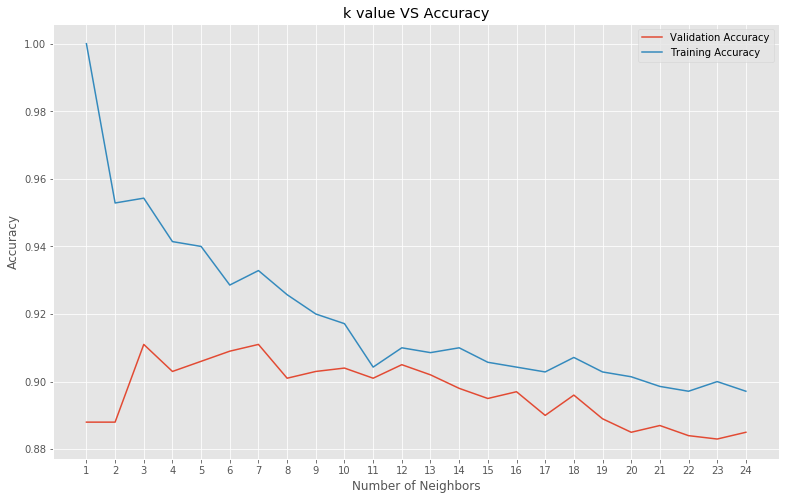

Best Accuracy without feature scaling: 0.9109999999999999
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


In [36]:
# Model complexity
neig = np.arange(1, 25)
kfold = 10
train_accuracy = []
val_accuracy = []
bestKnn = None
bestAcc = 0.0
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    val_accuracy.append(np.mean(cross_val_score(knn, X, y, cv=kfold)))
    if np.mean(cross_val_score(knn, X, y, cv=kfold)) > bestAcc:
        bestAcc = np.mean(cross_val_score(knn, X, y, cv=10))
        bestKnn = knn

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, val_accuracy, label = 'Validation Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()

print('Best Accuracy without feature scaling:', bestAcc)
print(bestKnn)

In [46]:
test.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

In [47]:
# predict test
test_fill = np.nan_to_num(test)#使用0代替nan，使用有限数字代替inf
submission = pd.DataFrame(bestKnn.predict(test_fill))
print(submission.shape)
submission.columns = ['Solution']
print(submission.shape)
submission['Id'] = np.arange(1,submission.shape[0]+1)
print(submission.shape)
submission = submission[['Id', 'Solution']]
submission

(9000, 1)
(9000, 1)
(9000, 2)


,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
5,6,0
6,7,0
7,8,1
8,9,0
9,10,0


In [52]:
submission.to_csv('/Users/szkfzx/datasets/ScikitLearn/submission_no_normalization.csv', index=False)

In [53]:
print(check_output(["ls", "/Users/szkfzx/datasets/ScikitLearn"]).decode("utf8"))

submission_no_normalization.csv
test.csv
train.csv
trainLabels.csv
working



# **Add feature scaling**

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
# 标准化、归一化、正则化
std = StandardScaler()
X_std = std.fit_transform(X)
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)
norm = Normalizer()
X_norm = norm.fit_transform(X)

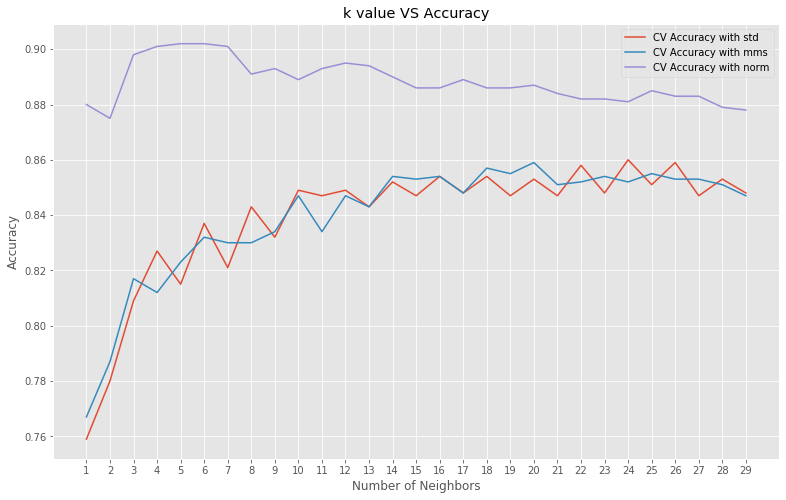

Best Accuracy with feature scaling: 0.9019999999999999
Best kNN classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Best scaling: norm


In [12]:
# Model complexity
neig = np.arange(1, 30)
kfold = 10
val_accuracy = {'std':[], 'mms':[], 'norm':[]}
bestKnn = None
bestAcc = 0.0
bestScaling = None
# Loop over different values of k
for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    # validation accuracy
    s1 = np.mean(cross_val_score(knn, X_std, y, cv=kfold))
    val_accuracy['std'].append(s1)
    s2 = np.mean(cross_val_score(knn, X_mms, y, cv=kfold))
    val_accuracy['mms'].append(s2)
    s3 = np.mean(cross_val_score(knn, X_norm, y, cv=kfold))
    val_accuracy['norm'].append(s3)
    if s1 > bestAcc:
        bestAcc = s1
        bestKnn = knn
        bestScaling = 'std'
    elif s2 > bestAcc:
        bestAcc = s2
        bestKnn = knn
        bestScaling = 'mms'
    elif s3 > bestAcc:
        bestAcc = s3
        bestKnn = knn
        bestScaling = 'norm'

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, val_accuracy['std'], label = 'CV Accuracy with std')
plt.plot(neig, val_accuracy['mms'], label = 'CV Accuracy with mms')
plt.plot(neig, val_accuracy['norm'], label = 'CV Accuracy with norm')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()

print('Best Accuracy with feature scaling:', bestAcc)
print('Best kNN classifier:', bestKnn)
print('Best scaling:', bestScaling)

In [54]:
# predict on test
bestKnn.fit(X_norm, y)
submission = pd.DataFrame(bestKnn.predict(norm.transform(test_fill)))
print(submission.shape)
submission.columns = ['Solution']
print(submission.shape)
submission['Id'] = np.arange(1,submission.shape[0]+1)
print(submission.shape)
submission = submission[['Id', 'Solution']]
submission

(9000, 1)
(9000, 1)
(9000, 2)


,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
5,6,0
6,7,0
7,8,1
8,9,0
9,10,0


In [55]:
submission.to_csv('/Users/szkfzx/datasets/ScikitLearn/submission_with_scaling.csv', index=False)

In [56]:
print(check_output(["ls", "/Users/szkfzx/datasets/ScikitLearn"]).decode("utf8"))

submission_no_normalization.csv
submission_with_scaling.csv
test.csv
train.csv
trainLabels.csv
working



# **Feature Selection**

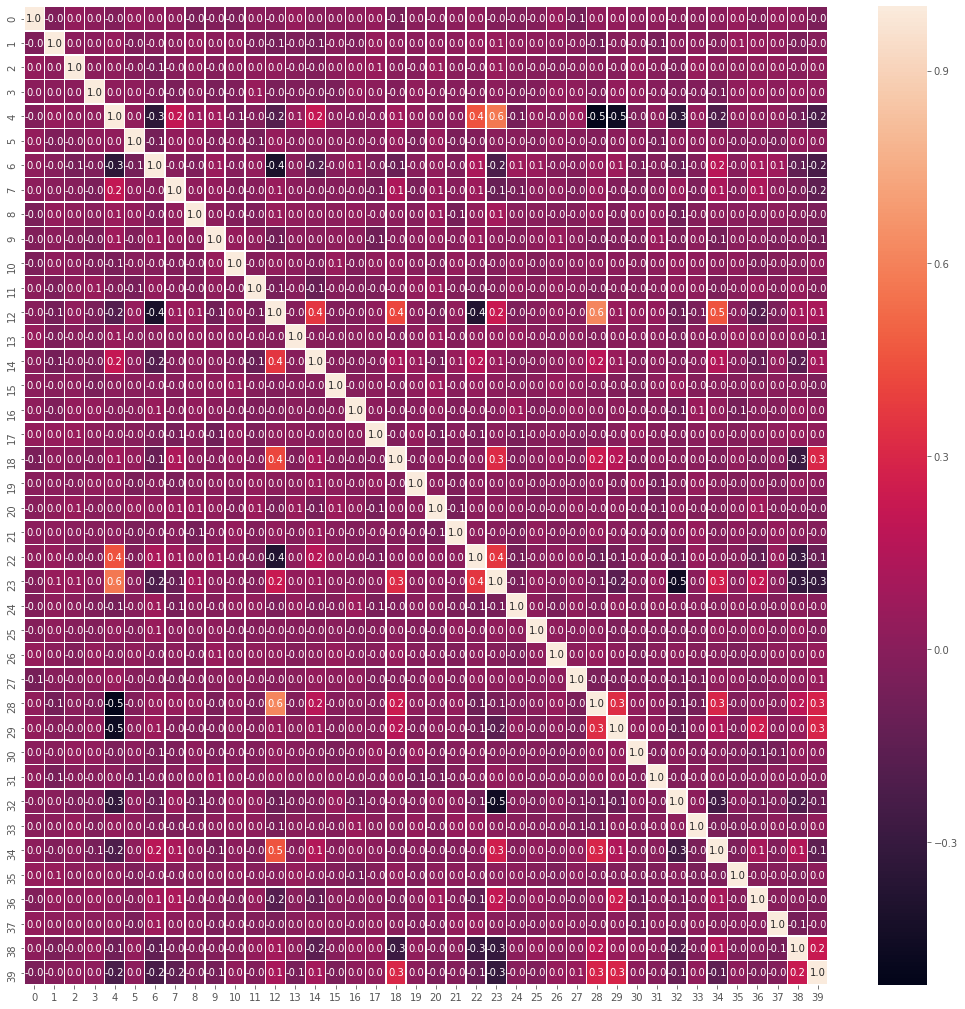

In [16]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(pd.DataFrame(X_std).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy is:  0.8366666666666667


/Users/szkfzx/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


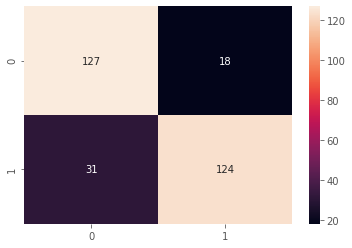

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and val 30 %
X_train, X_val, y_train, y_val = train_test_split(X_std, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_val,clf_rf.predict(X_val))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_val,clf_rf.predict(X_val))
sns.heatmap(cm,annot=True,fmt="d")

Univariate feature selection is not very accurate because independent variables may correlate with each other.
But it can give us a concept. Here we directly use more robust RFECV.

Optimal number of features : 9
Best features : Int64Index([6, 12, 14, 18, 29, 32, 34, 36, 39], dtype='int64')
Optimal number of features : 9
Best features : Int64Index([6, 12, 14, 18, 29, 32, 34, 36, 39], dtype='int64')
Optimal number of features : 26
Best features : Int64Index([ 1,  2,  4,  6,  7,  9, 12, 13, 14, 15, 17, 18, 19, 20, 21, 25, 26,
            27, 29, 32, 33, 34, 36, 37, 38, 39],
           dtype='int64')
Optimal number of features : 10
Best features : Int64Index([6, 7, 12, 14, 18, 29, 32, 34, 36, 39], dtype='int64')
Optimal number of features : 10
Best features : Int64Index([6, 7, 12, 14, 18, 29, 32, 34, 36, 39], dtype='int64')
Optimal number of features : 27
Best features : Int64Index([ 1,  2,  4,  6,  7,  9, 12, 13, 14, 15, 17, 18, 19, 20, 21, 25, 26,
            27, 29, 31, 32, 33, 34, 36, 37, 38, 39],
           dtype='int64')
[9, 9, 26, 10, 10, 27]


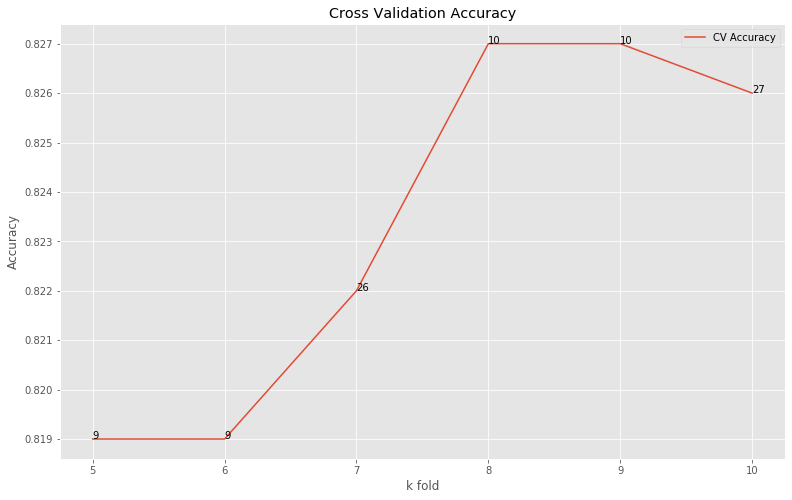

Best Accuracy with feature scaling and RFECV: 0.827


In [58]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

kfold = 10
bestSVC = None
bestAcc = 0.0
val_accuracy = []
cv_range = np.arange(5, 11)
n_feature = []
for cv in cv_range:
    # Create the RFE object and compute a cross-validated score.
    svc = SVC(kernel="linear")
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    rfecv = RFECV(estimator=svc, step=1, cv=cv, scoring='accuracy')
    rfecv.fit(X_std, y)

    print("Optimal number of features : %d" % rfecv.n_features_)
    print('Best features :', pd.DataFrame(X_train).columns[rfecv.support_])

    # Model complexity
    val_accuracy += [np.mean(cross_val_score(svc, X_std[:, rfecv.support_], y, cv=kfold))]
    n_feature.append(rfecv.n_features_)
    if val_accuracy[-1] > bestAcc:
        bestAcc = val_accuracy[-1]

print(n_feature)
        
# Plot
plt.figure(figsize=[13,8])
plt.plot(cv_range, val_accuracy, label = 'CV Accuracy')
for i in range(len(cv_range)):
    plt.annotate(str(n_feature[i]), xy=(cv_range[i],val_accuracy[i]))
plt.legend()
plt.title('Cross Validation Accuracy')
plt.xlabel('k fold')
plt.ylabel('Accuracy')
plt.show()

print('Best Accuracy with feature scaling and RFECV:', bestAcc)

In [60]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn import svm

#### READING OUR GIVEN DATA INTO PANDAS DATAFRAME ####
x_train = train
y_train = trainLabel
x_test = test
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_train = y_train.ravel()
print('training_x Shape:',x_train.shape,',training_y Shape:',y_train.shape, ',testing_x Shape:',x_test.shape)

#Checking the models
x_all = np.r_[x_train,x_test]
print('x_all shape :',x_all.shape)

#### USING THE GAUSSIAN MIXTURE MODEL ####
from sklearn.mixture import GaussianMixture
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(x_all)
        bic.append(gmm.aic(x_all))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
best_gmm.fit(x_all)
x_train = best_gmm.predict_proba(x_train)
x_test = best_gmm.predict_proba(x_test)


#### TAKING ONLY TWO MODELS FOR KEEPING IT SIMPLE ####
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

param_grid = dict( )
#### GRID SEARCH for BEST TUNING PARAMETERS FOR KNN #####
grid_search_knn = GridSearchCV(knn,param_grid=param_grid,cv=10,scoring='accuracy').fit(x_train,y_train)
print('best estimator KNN:',grid_search_knn.best_estimator_,'Best Score', grid_search_knn.best_estimator_.score(x_train,y_train))
knn_best = grid_search_knn.best_estimator_

#### GRID SEARCH for BEST TUNING PARAMETERS FOR RandomForest #####
grid_search_rf = GridSearchCV(rf, param_grid=dict( ), verbose=3,scoring='accuracy',cv=10).fit(x_train,y_train)
print('best estimator RandomForest:',grid_search_rf.best_estimator_,'Best Score', grid_search_rf.best_estimator_.score(x_train,y_train))
rf_best = grid_search_rf.best_estimator_

knn_best.fit(x_train,y_train)
print(knn_best.predict(x_test)[0:10])
rf_best.fit(x_train,y_train)
print(rf_best.predict(x_test)[0:10])

#### SCORING THE MODELS ####
print('Score for KNN :',cross_val_score(knn_best,x_train,y_train,cv=10,scoring='accuracy').mean())
print('Score for Random Forest :',cross_val_score(rf_best,x_train,y_train,cv=10,scoring='accuracy').max())

### IN CASE WE WERE USING MORE THAN ONE CLASSIFIERS THEN VOTING CLASSIFIER CAN BE USEFUL ###
clf = VotingClassifier(
estimators=[('knn_best',knn_best),('rf_best',rf_best)],
    weights=[871856020222,0.907895269918]
)
clf.fit(x_train,y_train)
print(clf.predict(x_test)[0:10])

##### FRAMING OUR SOLUTION #####
knn_best_pred = pd.DataFrame(knn_best.predict(x_test))
rf_best_pred = pd.DataFrame(rf_best.predict(x_test))
voting_clf_pred = pd.DataFrame(clf.predict(x_test))

knn_best_pred.index += 1
rf_best_pred.index += 1
voting_clf_pred.index += 1

rf_best_pred.columns = ['Solution']
rf_best_pred['Id'] = np.arange(1,rf_best_pred.shape[0]+1)
rf_best_pred = rf_best_pred[['Id', 'Solution']]
print(rf_best_pred)

knn_best_pred.to_csv('knn_best_pred.csv')
rf_best_pred.to_csv('Submission_rf.csv', index=False)
voting_clf_pred.to_csv('voting_clf_pred.csv')


training_x Shape: (1000, 40) ,training_y Shape: (1000,) ,testing_x Shape: (9000, 40)
x_all shape : (10000, 40)
best estimator KNN: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') Best Score 0.996
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................
[CV] .................................... , score=1.000, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=1.000, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=1.000, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.990, total=   0.0s
[CV]  ..............................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/szkfzx/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/szkfzx/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/Users/szkfzx/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarnin

[1 0 1 0 0 0 0 1 0 0]
[1 0 1 0 0 0 0 1 0 0]
Score for KNN : 0.9960000000000001
Score for Random Forest : 1.0
[1 0 1 0 0 0 0 1 0 0]
        Id  Solution
1        1         1
2        2         0
3        3         1
4        4         0
5        5         0
6        6         0
7        7         0
8        8         1
9        9         0
10      10         0
11      11         1
12      12         1
13      13         0
14      14         0
15      15         0
16      16         1
17      17         0
18      18         0
19      19         1
20      20         1
21      21         0
22      22         1
23      23         1
24      24         0
25      25         1
26      26         1
27      27         0
28      28         0
29      29         1
30      30         0
...    ...       ...
8971  8971         1
8972  8972         0
8973  8973         1
8974  8974         0
8975  8975         0
8976  8976         1
8977  8977         0
8978  8978         1
8979  8979         1
8980  89